# 1.对战队的分析

In [19]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('./CsgoStat/team_stats.csv')

# 按国家分组并计算每个国家的Name项数
country_name_counts = df.groupby('country')['name'].count()


In [20]:
country_name_counts

country
Albania                  1
Argentina                4
Asia                     1
Australia               27
Belarus                  2
Belgium                  2
Brazil                  29
Bulgaria                10
CIS                      3
Canada                   6
China                   16
Colombia                 2
Czech Republic           2
Denmark                 19
Estonia                  1
Europe                  13
Finland                  8
France                  15
Germany                 12
Hungary                  2
India                    1
Indonesia                3
Japan                    1
Kazakhstan               5
Korea                    3
Lithuania                1
Malaysia                 2
Mongolia                 4
Netherlands              1
New Zealand              1
North America            3
Norway                   5
Oceania                  1
Philippines              3
Poland                  18
Portugal                 5
Romania             

In [21]:
df

,Unnamed: 0,name,country,total_maps,kd_diff,kd,rating,kill,death,force
0,0,Grayhound,Australia,553,7229,1.16,1.07,52410,45181,16647
1,1,Recca,Indonesia,280,1816,1.08,1.07,24516,22700,6230
2,2,Kings,Australia,122,1922,1.20,1.07,11532,9610,4000
3,3,Flash,China,316,1559,1.06,1.07,27542,25983,6512
4,4,DarkPassage,Turkey,122,1177,1.11,1.06,11877,10700,3267
...,...,...,...,...,...,...,...,...,...,...
356,356,Unicorns of Love,Germany,178,-1536,0.90,0.95,13824,15360,837
357,357,EMP,China,125,-556,0.95,0.94,10564,11120,1169
358,358,Bulldozer,Brazil,106,-814,0.92,0.94,9361,10175,742
359,359,Dynasty,Australia,101,-473,0.95,0.93,8987,9460,976


## 世界战队分布

C:\Users\Hezhili\AppData\Local\Temp\ipykernel_22324\2207906433.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\Hezhili\AppData\Local\Temp\ipykernel_22324\2207906433.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(country_name_counts.index, rotation=45, ha='right')


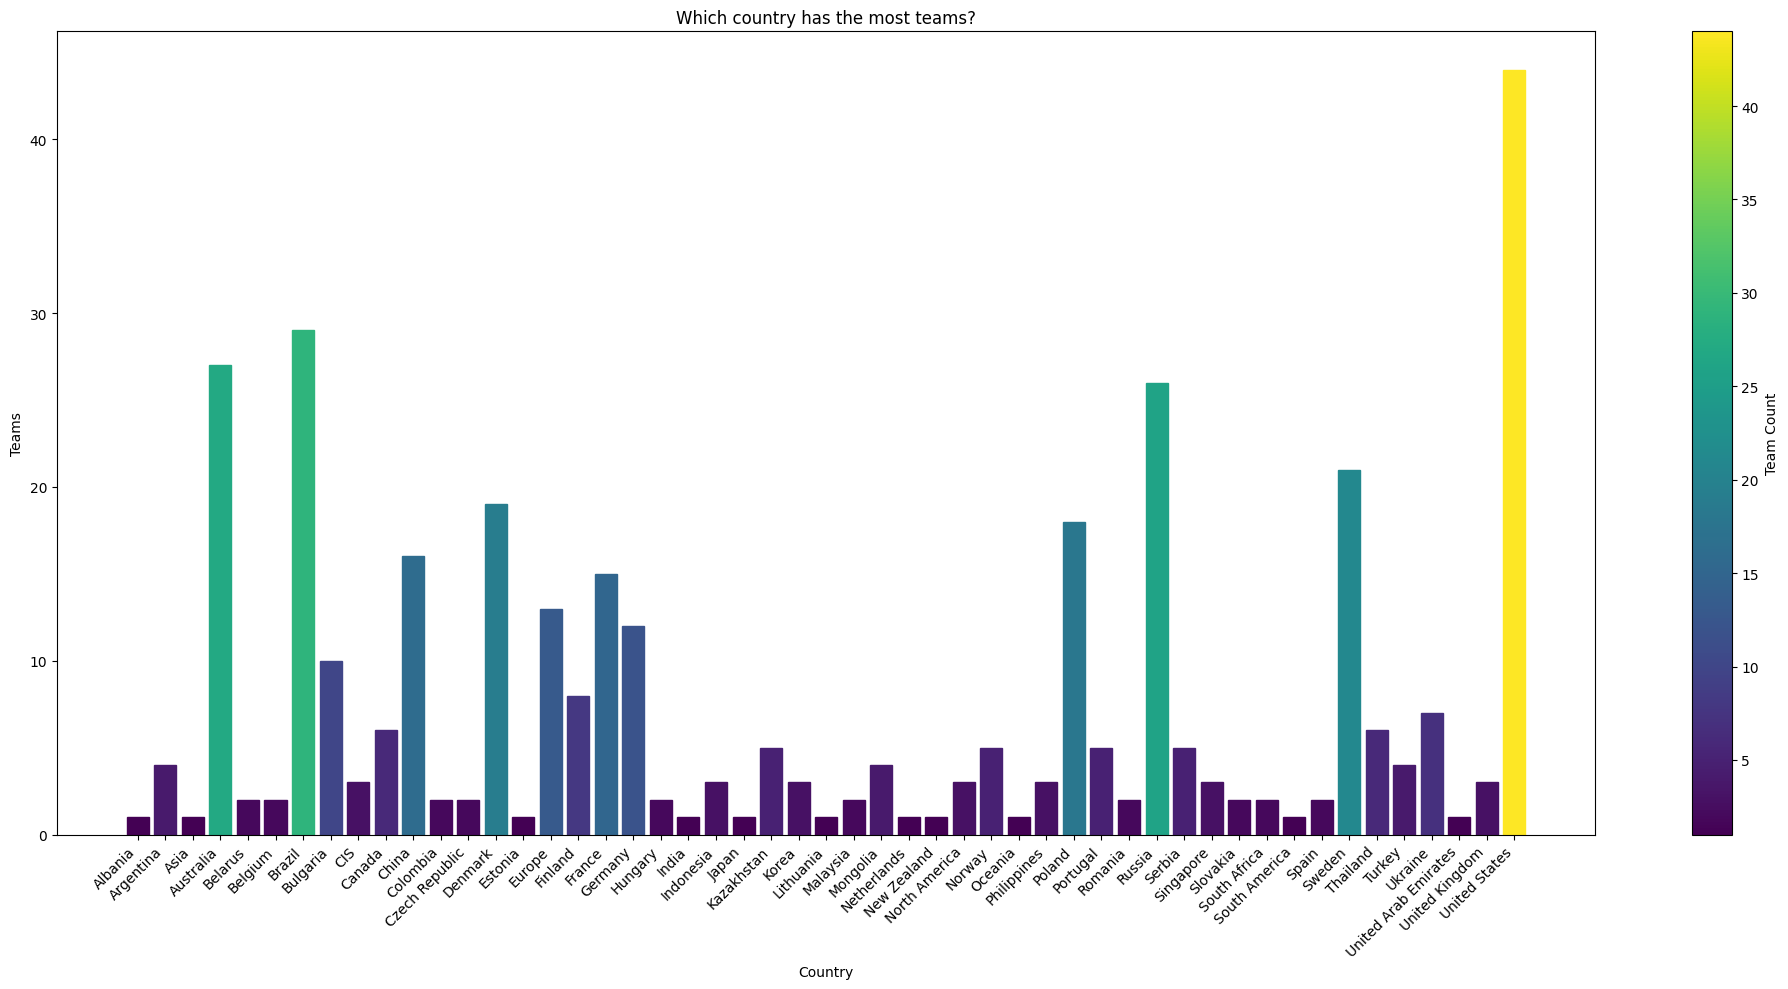

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取CSV文件
df = pd.read_csv('./CsgoStat/team_stats.csv')

# 按国家分组并计算每个国家的Name项数
country_name_counts = df.groupby('country')['name'].count()

# 创建柱状图
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(country_name_counts.index, country_name_counts.values)

# 创建颜色映射

cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=min(country_name_counts.values), vmax=max(country_name_counts.values))
colors = [cmap(normalize(value)) for value in country_name_counts.values]

# 设置颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 添加颜色条
sm = cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)  # 在当前轴上添加颜色条
cbar.set_label('Team Count')

# 设置图表标题和轴标签
ax.set_xlabel('Country')
ax.set_ylabel('Teams')
ax.set_title('Which country has the most teams?')
ax.set_xticklabels(country_name_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


战队世界分布的图坐在网页中world_map.html

## 可以看出csgo职业战队主要活力在欧洲

In [23]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 定义数据
data = [
    ["Albania", 41.1533, 20.1683, 1], ["Argentina", -38.4161, -63.6167, 4],
    ["Asia", 34.0479, 100.6197, 1], ["Australia", -25.2744, 133.7751, 27],
    ["Belarus", 53.7098, 27.9534, 2], ["Belgium", 50.5039, 4.4699, 2],
    ["Brazil", -14.2350, -51.9253, 29], ["Bulgaria", 42.7339, 25.4858, 10],
    ["CIS", 55.7558, 37.6176, 3], ["Canada", 56.1304, -106.3468, 6],
    ["China", 35.8617, 104.1954, 16], ["Colombia", 4.5709, -74.2973, 2],
    ["Czech Republic", 49.8175, 15.4730, 2], ["Denmark", 56.2639, 9.5018, 19],
    ["Estonia", 58.5953, 25.0136, 1], ["Europe", 48.8566, 2.3522, 13],
    ["Finland", 61.9241, 25.7482, 8], ["France", 46.6034, 1.8883, 15],
    ["Germany", 51.1657, 10.4515, 12], ["Hungary", 47.1625, 19.5033, 2],
    ["India", 20.5937, 78.9629, 1], ["Indonesia", -0.7893, 113.9213, 3],
    ["Japan", 36.2048, 138.2529, 1], ["Kazakhstan", 48.0196, 66.9237, 5],
    ["Korea", 35.9078, 127.7669, 3], ["Lithuania", 55.1694, 23.8813, 1],
    ["Malaysia", 4.2105, 101.9758, 2], ["Mongolia", 46.8625, 103.8467, 4],
    ["Netherlands", 52.1326, 5.2913, 1], ["New Zealand", -40.9006, 174.8860, 1],
    ["North America", 54.525961, -105.255119, 3], ["Norway", 60.4720, 8.4689, 5],
    ["Oceania", -25.2744, 133.7751, 1], ["Philippines", 12.8797, 121.7740, 3],
    ["Poland", 51.9194, 19.1451, 18], ["Portugal", 39.3999, -8.2245, 5],
    ["Romania", 45.9432, 24.9668, 2], ["Russia", 61.5240, 105.3188, 26],
    ["Serbia", 44.0165, 21.0059, 5], ["Singapore", 1.3521, 103.8198, 3],
    ["Slovakia", 48.6690, 19.6990, 2], ["South Africa", -30.5595, 22.9375, 2],
    ["South America", -14.2350, -51.9253, 1], ["Spain", 40.4637, -3.7492, 2],
    ["Sweden", 60.1282, 18.6435, 21], ["Thailand", 15.8700, 100.9925, 6],
    ["Turkey", 38.9637, 35.2433, 4], ["Ukraine", 48.3794, 31.1656, 7],
    ["United Arab Emirates", 23.4241, 53.8478, 1], ["United Kingdom", 55.3781, -3.4360, 3],
    ["United States", 37.0902, -95.7129, 44],
]



In [24]:
data

[['Albania', 41.1533, 20.1683, 1],
 ['Argentina', -38.4161, -63.6167, 4],
 ['Asia', 34.0479, 100.6197, 1],
 ['Australia', -25.2744, 133.7751, 27],
 ['Belarus', 53.7098, 27.9534, 2],
 ['Belgium', 50.5039, 4.4699, 2],
 ['Brazil', -14.235, -51.9253, 29],
 ['Bulgaria', 42.7339, 25.4858, 10],
 ['CIS', 55.7558, 37.6176, 3],
 ['Canada', 56.1304, -106.3468, 6],
 ['China', 35.8617, 104.1954, 16],
 ['Colombia', 4.5709, -74.2973, 2],
 ['Czech Republic', 49.8175, 15.473, 2],
 ['Denmark', 56.2639, 9.5018, 19],
 ['Estonia', 58.5953, 25.0136, 1],
 ['Europe', 48.8566, 2.3522, 13],
 ['Finland', 61.9241, 25.7482, 8],
 ['France', 46.6034, 1.8883, 15],
 ['Germany', 51.1657, 10.4515, 12],
 ['Hungary', 47.1625, 19.5033, 2],
 ['India', 20.5937, 78.9629, 1],
 ['Indonesia', -0.7893, 113.9213, 3],
 ['Japan', 36.2048, 138.2529, 1],
 ['Kazakhstan', 48.0196, 66.9237, 5],
 ['Korea', 35.9078, 127.7669, 3],
 ['Lithuania', 55.1694, 23.8813, 1],
 ['Malaysia', 4.2105, 101.9758, 2],
 ['Mongolia', 46.8625, 103.8467, 4],
 

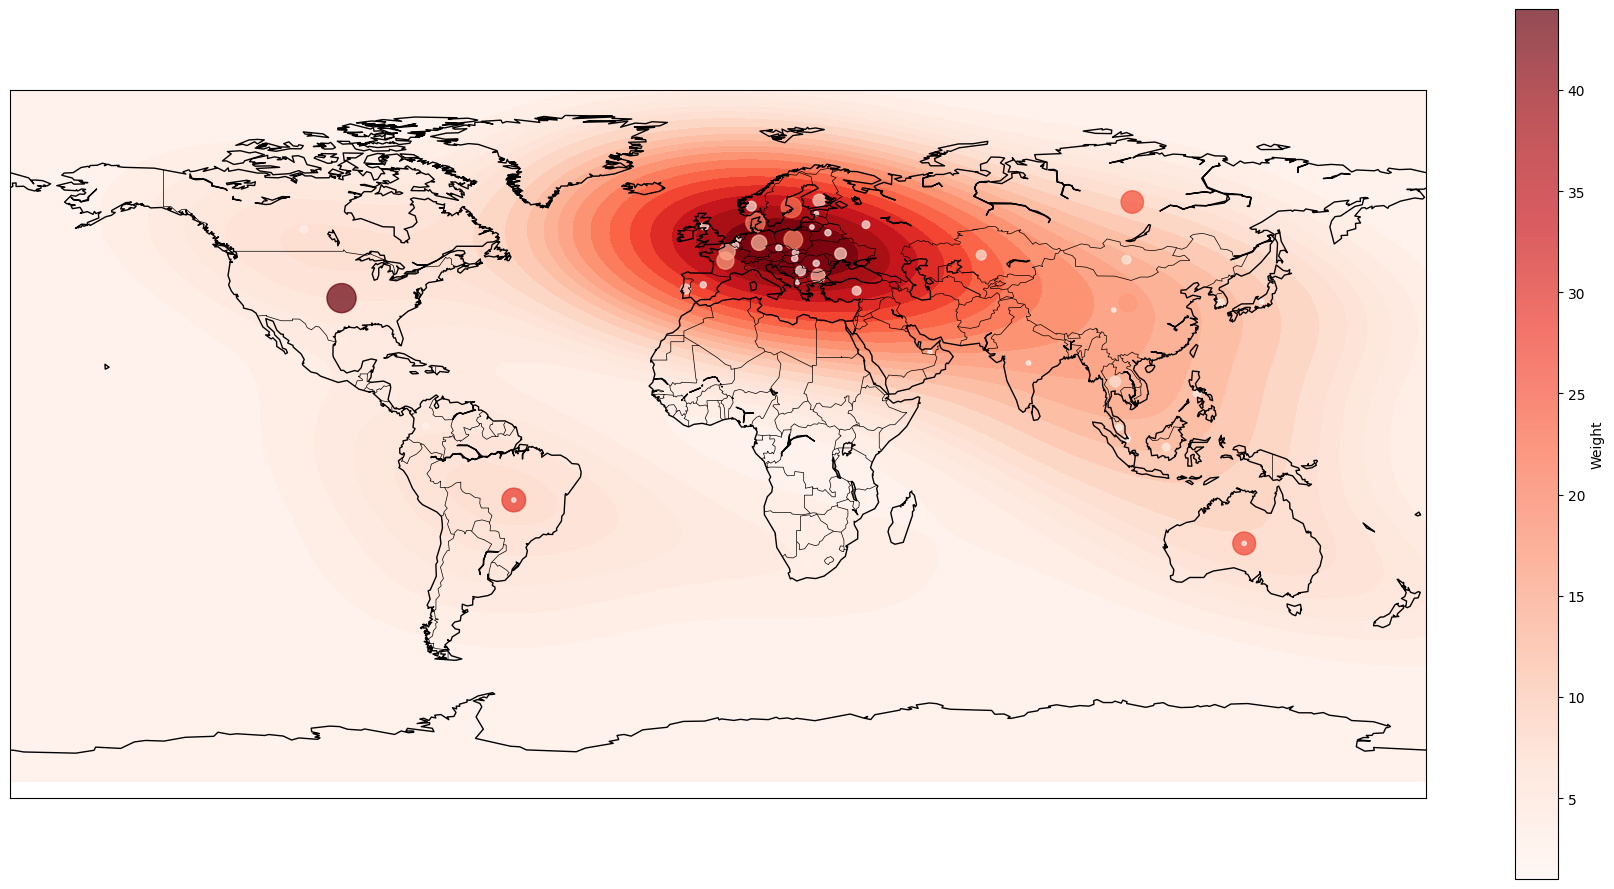

In [25]:
# 提取坐标和权重
coordinates = np.array([[d[2], d[1]] for d in data])  # 注意经纬度顺序
weights = np.array([d[3] for d in data])

# 创建底图和热力图
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111)

# 创建Basemap实例
m = Basemap(projection='cyl', resolution='c', ax=ax)
m.drawcoastlines()
m.drawcountries()

# 绘制核密度估计图
kde = sns.kdeplot(x=coordinates[:, 0], y=coordinates[:, 1], cmap="Reds", fill=True, thresh=0, levels=20, ax=ax)

# 绘制散点图
x, y = m(coordinates[:, 0], coordinates[:, 1])  # 将经纬度转换为地图投影坐标
scatter = ax.scatter(x, y, s=weights*10, c=weights, cmap='Reds', alpha=0.7)

# 显示图例
plt.colorbar(scatter, ax=ax, label='Weight')

# 隐藏标题和轴标签
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

# 显示图形
plt.tight_layout()
plt.show()

## CSGO 搜索强度

In [26]:
geo_data = {
    'Macao': {'lat': 22.1987, 'lon': 113.5439},
    'Sweden': {'lat': 59.3293, 'lon': 18.0686},
    'Finland': {'lat': 60.1695, 'lon': 24.9354},
    'Ethiopia': {'lat': 9.145, 'lon': 40.4897},
    'Lithuania': {'lat': 54.6872, 'lon': 25.2797},
    'Estonia': {'lat': 59.437, 'lon': 24.7536},
    'Norway': {'lat': 60.472, 'lon': 8.4689},
    'Denmark': {'lat': 56.2639, 'lon': 9.5018},
    'Latvia': {'lat': 56.8796, 'lon': 24.6032},
    'Hong Kong': {'lat': 22.3193, 'lon': 114.1694},
    'Luxembourg': {'lat': 49.8153, 'lon': 6.1296},
    'Portugal': {'lat': 38.7223, 'lon': -9.1393},
    'Taiwan': {'lat': 25.033, 'lon': 121.5654},
    'Germany': {'lat': 52.52, 'lon': 13.405},
    'Singapore': {'lat': 1.3521, 'lon': 103.8198},
    'Czechia': {'lat': 50.0755, 'lon': 14.4378},
    'Belgium': {'lat': 50.8503, 'lon': 4.3517},
    'Hungary': {'lat': 47.4979, 'lon': 19.0402},
    'Australia': {'lat': -35.4735, 'lon': 149.0124},
    'Austria': {'lat': 48.2082, 'lon': 16.3738},
    'New Zealand': {'lat': -41.2865, 'lon': 174.7762},
    'Russia': {'lat': 55.7558, 'lon': 37.6176},
    'Slovakia': {'lat': 48.1486, 'lon': 17.1077},
    'Canada': {'lat': 45.4215, 'lon': -75.6919},
    'France': {'lat': 48.8566, 'lon': 2.3522},
    'Romania': {'lat': 44.4268, 'lon': 26.1025},
    'Belarus': {'lat': 53.9045, 'lon': 27.5615},
    'Netherlands': {'lat': 52.3676, 'lon': 4.9041},
    'China': {'lat': 39.9042, 'lon': 116.4074},
    'Kazakhstan': {'lat': 51.1657, 'lon': 71.4151},
    'Ukraine': {'lat': 50.4501, 'lon': 30.5234},
    'United Kingdom': {'lat': 51.5074, 'lon': -0.1278},
    'Malaysia': {'lat': 3.139, 'lon': 101.6869},
    'Switzerland': {'lat': 46.8182, 'lon': 8.2275},
    'Bosnia & Herzegovina': {'lat': 43.9159, 'lon': 17.6791},
    'Spain': {'lat': 40.4168, 'lon': -3.7038},
    'Slovenia': {'lat': 46.0569, 'lon': 14.5058},
    'Poland': {'lat': 52.2297, 'lon': 21.0122},
    'United States': {'lat': 37.0902, 'lon': -95.7129},
    'Israel': {'lat': 31.7683, 'lon': 35.2137},
    'Croatia': {'lat': 45.815, 'lon': 15.9819},
    'Thailand': {'lat': 13.7563, 'lon': 100.5018},
    'Japan': {'lat': 35.6895, 'lon': 139.6917},
    'Chile': {'lat': -33.4489, 'lon': -70.6693},
    'Philippines': {'lat': 14.5995, 'lon': 120.9842},
    'Ireland': {'lat': 53.3498, 'lon': -6.2603},
    'Tunisia': {'lat': 33.8869, 'lon': 9.5375},
    'Serbia': {'lat': 44.7866, 'lon': 20.4489},
    'Uruguay': {'lat': -34.9011, 'lon': -56.1645},
    'South Africa': {'lat': -25.746, 'lon': 28.1871},
    'Bulgaria': {'lat': 42.6977, 'lon': 23.3219},
    'Brazil': {'lat': -15.8267, 'lon': -47.9218},
    'Argentina': {'lat': -34.6037, 'lon': -58.3816},
    'Greece': {'lat': 37.9838, 'lon': 23.7275},
    'Algeria': {'lat': 36.7372, 'lon': 3.087},
    'Indonesia': {'lat': -6.2088, 'lon': 106.8456},
    'Pakistan': {'lat': 30.3753, 'lon': 69.3451},
    'Vietnam': {'lat': 21.0278, 'lon': 105.8342},
    'South Korea': {'lat': 37.5665, 'lon': 126.978},
    'Italy': {'lat': 41.9028, 'lon': 12.4964},
    'India': {'lat': 28.6139, 'lon': 77.209},
    'Peru': {'lat': -12.0464, 'lon': -77.0428},
    'Saudi Arabia': {'lat': 24.7136, 'lon': 46.6753},
    'Venezuela': {'lat': 10.4806, 'lon': -66.9036},
    'Turkey': {'lat': 41.0082, 'lon': 28.9784},
    'Colombia': {'lat': 4.7105, 'lon': -74.0721},
    'Mexico': {'lat': 19.4326, 'lon': -99.1332},
    'Lebanon': {'lat': 33.8547, 'lon': 35.8623},
    'Zimbabwe': {'lat': -17.8252, 'lon': 31.0335},
    'Eritrea': {'lat': 15.1794, 'lon': 39.7823},
    'Egypt': {'lat': 30.033, 'lon': 31.2336},
    'Ecuador': {'lat': -0.1807, 'lon': -78.4678},
    'Dominican Republic': {'lat': 18.7357, 'lon': -70.1627},
    'Fiji': {'lat': -18.1248, 'lon': 178.4501},
    'Falkland Islands': {'lat': -51.7963, 'lon': -59.5236},
    'Dominica': {'lat': 15.414999999999999, 'lon': -61.370976},
    'Faroe Islands': {'lat': 61.8926, 'lon': -6.9118},
    'Micronesia': {'lat': 7.4256, 'lon': 150.5508},
    'Gabon': {'lat': -0.8037, 'lon': 11.6094},
    'Djibouti': {'lat': 11.8251, 'lon': 42.5903},
    'Georgia': {'lat': 41.7151, 'lon': 44.8271},
    'Guernsey': {'lat': 49.4657, 'lon': -2.5853},
    'Ghana': {'lat': 5.6037, 'lon': -0.187},
    'Gibraltar': {'lat': 36.1447, 'lon': -5.3526},
    'Guinea': {'lat': 9.9456, 'lon': -9.6966},
    'Guadeloupe': {'lat': 16.265, 'lon': -61.551},
    'Gambia': {'lat': 13.4432, 'lon': -15.3101},
    'Guinea-Bissau': {'lat': 11.8037, 'lon': -15.1804},
    'Equatorial Guinea': {'lat': 3.7523, 'lon': 8.7737},
    'Cyprus': {'lat': 35.1264, 'lon': 33.4299},
    'Grenada': {'lat': 12.1165, 'lon': -61.678999999999995},
    'Greenland': {'lat': 71.7069, 'lon': -42.6043},
    'Guatemala': {'lat': 14.6349, 'lon': -90.5069},
    'French Guiana': {'lat': 4.9355, 'lon': -52.3135},
    'Guam': {'lat': 13.4443, 'lon': 144.7937},
    'Guyana': {'lat': 6.8013, 'lon': -58.1551},
    'Cayman Islands': {'lat': 19.3133, 'lon': -81.2546},
    'Heard & McDonald Islands': {'lat': -53.0818, 'lon': 73.5042},
    'Honduras': {'lat': 14.6349, 'lon': -86.5661},
    'Christmas Island': {'lat': -10.4475, 'lon': 105.6904},
    'Haiti': {'lat': 18.9712, 'lon': -72.2852},
    'Curaçao': {'lat': 12.1696, 'lon': -68.9900},
    'Cuba': {'lat': 23.1136, 'lon': -82.3666},
    'Isle of Man': {'lat': 54.2361, 'lon': -4.5481},
    'Costa Rica': {'lat': 9.7489, 'lon': -83.7534},
    'British Indian Ocean Territory': {'lat': -6.343194, 'lon': 71.876519},
    'Cape Verde': {'lat': 15.1201, 'lon': -23.6052},
    'Iran': {'lat': 32.4279, 'lon': 53.6880},
    'Iraq': {'lat': 33.3152, 'lon': 44.3661},
    'Iceland': {'lat': 64.9631, 'lon': -19.0208},
    'Comoros': {'lat': -11.6455, 'lon': 43.3333},
    'Cook Islands': {'lat': -21.2367, 'lon': -159.7777},
    'Jamaica': {'lat': 18.1096, 'lon': -77.2975},
    'Jersey': {'lat': 49.2144, 'lon': -2.1313},
    'Jordan': {'lat': 31.9500, 'lon': 35.9333},
    'Congo - Brazzaville': {'lat': -4.2634, 'lon': 15.2429},
    'Congo - Kinshasa': {'lat': -4.4419, 'lon': 15.2663},
    'Kenya': {'lat': -1.2921, 'lon': 36.8219},
    'Kyrgyzstan': {'lat': 41.2044, 'lon': 74.7661},
    'Cambodia': {'lat': 11.5564, 'lon': 104.9282},
    'Kiribati': {'lat': 1.8709, 'lon': -157.363},
    'St. Kitts & Nevis': {'lat': 17.357822, 'lon': -62.782998},
    'Cameroon': {'lat': 3.8480000000000003, 'lon': 11.5021},
    'Kuwait': {'lat': 29.3759, 'lon': 47.9774},
    'Laos': {'lat': 17.9757, 'lon': 102.6331},
    'Aruba': {'lat': 12.5211, 'lon': -69.9683},
    'Angola': {'lat': -8.839, 'lon': 13.2894},
    'Libya': {'lat': 26.3351, 'lon': 17.2283},
    'St. Lucia': {'lat': 13.9094, 'lon': -60.9789},
    'Liechtenstein': {'lat': 47.141, 'lon': 9.5209},
    'Sri Lanka': {'lat': 7.8731, 'lon': 80.7718},
    'Lesotho': {'lat': -29.609988, 'lon': 28.233608},
    'Côte d’Ivoire': {'lat': 5.359952, 'lon': -4.008256},
    'Cocos (Keeling) Islands': {'lat': -12.1642, 'lon': 96.8708},
    'Central African Republic': {'lat': 6.6111, 'lon': 20.9394},
    'Botswana': {'lat': -24.658, 'lon': 25.9121},
    'St. Martin': {'lat': 18.075277777777777, 'lon': -63.05972222222222},
    'Morocco': {'lat': 31.7925, 'lon': -7.0907},
    'Monaco': {'lat': 43.7396, 'lon': 7.4069},
    'Moldova': {'lat': 47.0248, 'lon': 28.8321},
    'Madagascar': {'lat': -18.8792, 'lon': 47.5079},
    'Maldives': {'lat': 3.2028, 'lon': 73.2207},
    'Bouvet Island': {'lat': -54.4208, 'lon': 3.3461},
    'Marshall Islands': {'lat': 7.1315, 'lon': 171.1845},
    'North Macedonia': {'lat': 41.6086, 'lon': 21.7453},
    'Mali': {'lat': 12.6392, 'lon': -8.0029},
    'Malta': {'lat': 35.8989, 'lon': 14.5146},
    'Myanmar (Burma)': {'lat': 16.8409, 'lon': 96.1735},
    'Montenegro': {'lat': 42.7087, 'lon': 19.3744},
    'Mongolia': {'lat': 47.9212, 'lon': 106.9186},
    'Northern Mariana Islands': {'lat': 15.0979, 'lon': 145.6739},
    'Mozambique': {'lat': -25.9655, 'lon': 32.5832},
    'Mauritania': {'lat': 21.0079, 'lon': -10.9408},
    'Montserrat': {'lat': 16.7415, 'lon': -62.1929},
    'Martinique': {'lat': 14.6415, 'lon': -61.0242},
    'Mauritius': {'lat': -20.3484, 'lon': 57.5522},
    'Malawi': {'lat': -13.2543, 'lon': 34.3015},
    'Bhutan': {'lat': 27.5142, 'lon': 90.4336},
    'Mayotte': {'lat': -12.8275, 'lon': 45.166244},
    'Western Sahara': {'lat': 24.2155, 'lon': -12.8858},
    'New Caledonia': {'lat': -22.2711, 'lon': 166.4414},
    'Niger': {'lat': 13.5127, 'lon': 2.1126},
    'Norfolk Island': {'lat': -29.0408, 'lon': 167.9547},
    'Nigeria': {'lat': 9.082, 'lon': 8.6753},
    'Nicaragua': {'lat': 12.8654, 'lon': -85.2072},
    'Niue': {'lat': -19.0544, 'lon': -169.8672},
    'Brunei': {'lat': 4.5353, 'lon': 114.7277},
    'Barbados': {'lat': 13.1939, 'lon': -59.5432},
    'Nepal': {'lat': 27.7172, 'lon': 85.324},
    'Nauru': {'lat': -0.5477, 'lon': 166.920867},
    'Bolivia': {'lat': -16.2902, 'lon': -63.5887},
    'Oman': {'lat': 23.614, 'lon': 58.5903},
    'Bermuda': {'lat': 32.3078, 'lon': -64.7505},
    'Panama': {'lat': 8.9824, 'lon': -79.5199},
    'Pitcairn Islands': {'lat': -24.3763, 'lon': -128.3242},
    'Belize': {'lat': 17.251, 'lon': -88.759},
    'St. Barthélemy': {'lat': 17.9000, 'lon': -62.8333},
    'Palau': {'lat': 7.5149, 'lon': 134.5825},
    'Papua New Guinea': {'lat': -9.4438, 'lon': 147.1803},
    'Bahamas': {'lat': 25.0343, 'lon': -77.3963},
    'Puerto Rico': {'lat': 18.2208, 'lon': -66.5901},
    'North Korea': {'lat': 39.0392, 'lon': 125.7625},
    'Bahrain': {'lat': 26.1921, 'lon': 50.5354},
    'Paraguay': {'lat': -25.2637, 'lon': -57.5759},
    'Palestine': {'lat': 31.9522, 'lon': 35.2332},
    'French Polynesia': {'lat': -17.6797, 'lon': -149.4068},
    'Qatar': {'lat': 25.276987, 'lon': 51.520077},
    'Réunion': {'lat': -20.8789, 'lon': 55.4481},
    'Bangladesh': {'lat': 23.8103, 'lon': 90.4125},
    'Burkina Faso': {'lat': 12.3714, 'lon': -1.5197},
    'Rwanda': {'lat': -1.9706, 'lon': 30.1044},
    'Caribbean Netherlands': {'lat': 12.1845, 'lon': -68.2624},
    'Sudan': {'lat': 15.5007, 'lon': 32.5599},
    'Senegal': {'lat': 14.7167, 'lon': -17.4677},
    'Benin': {'lat': 6.5244, 'lon': 2.4244},
    'South Georgia & South Sandwich Islands': {'lat': -54.2823, 'lon': -36.5026},
    'St. Helena': {'lat': -15.9655, 'lon': -5.7089},
    'Svalbard & Jan Mayen': {'lat': 78.2333, 'lon': 15.6333},
    'Solomon Islands': {'lat': -9.6457, 'lon': 160.1562},
    'Sierra Leone': {'lat': 8.4606, 'lon': -11.7799},
    'El Salvador': {'lat': 13.7942, 'lon': -88.8965},
    'San Marino': {'lat': 43.9424, 'lon': 12.4578},
    'Somalia': {'lat': 2.0469, 'lon': 45.3182},
    'St. Pierre & Miquelon': {'lat': 46.8852, 'lon': -56.3159},
    'Burundi': {'lat': -3.3731, 'lon': 29.9189},
    'South Sudan': {'lat': 4.8531, 'lon': 31.5825},
    'São Tomé & Príncipe': {'lat': 0.3302, 'lon': 6.7334},
    'Suriname': {'lat': 5.8232, 'lon': -55.1679},
    'Azerbaijan': {'lat': 40.4093, 'lon': 49.8671},
    'Antigua & Barbuda': {'lat': 17.0608, 'lon': -61.7964},
    'French Southern Territories': {'lat': -49.280366, 'lon': 69.348557},
    'Eswatini': {'lat': -26.5225, 'lon': 31.4659},
    'Sint Maarten': {'lat': 18.0425, 'lon': -63.0548},
    'Seychelles': {'lat': -4.6796, 'lon': 55.492},
    'Syria': {'lat': 33.5138, 'lon': 36.2765},
    'Turks & Caicos Islands': {'lat': 21.694, 'lon': -71.7979},
    'Chad': {'lat': 12.1348, 'lon': 15.0557},
    'Togo': {'lat': 6.1153, 'lon': 1.2255},
    'Antarctica': {'lat': -90.0, 'lon': 0.0},
    'Tajikistan': {'lat': 38.861, 'lon': 71.2761},
    'Tokelau': {'lat': -9.2002, 'lon': -171.8484},
    'Turkmenistan': {'lat': 38.9697, 'lon': 59.5563},
    'Timor-Leste': {'lat': -8.8742, 'lon': 125.7275},
    'Tonga': {'lat': -21.1789, 'lon': -175.1982},
    'Trinidad & Tobago': {'lat': 10.6918, 'lon': -61.2225},
    'American Samoa': {'lat': -14.271, 'lon': -170.132},
    'Armenia': {'lat': 40.1872, 'lon': 44.5152},
    'Tuvalu': {'lat': -7.1095, 'lon': 177.6493},
    'United Arab Emirates': {'lat': 23.4241, 'lon': 53.8478},
    'Tanzania': {'lat': -6.1659, 'lon': 39.2026},
    'Uganda': {'lat': 0.3476, 'lon': 32.5825},
    'Andorra': {'lat': 42.5063, 'lon': 1.5218},
    'U.S. Outlying Islands': {'lat': 21.3299, 'lon': -157.846},
    'Albania': {'lat': 41.3275, 'lon': 19.8187},
    'Åland Islands': {'lat': 60.1785, 'lon': 19.9156},
    'Uzbekistan': {'lat': 41.3775, 'lon': 64.5853},
    'Vatican City': {'lat': 41.9029, 'lon': 12.4534},
    'St. Vincent & Grenadines': {'lat': 13.253, 'lon': -61.197},
    'Anguilla': {'lat': 18.2206, 'lon': -63.0686},
    'British Virgin Islands': {'lat': 18.4207, 'lon': -64.64},
    'U.S. Virgin Islands': {'lat': 18.3358, 'lon': -64.8963},
    'Afghanistan': {'lat': 34.5553, 'lon': 69.2075},
    'Vanuatu': {'lat': -17.7348, 'lon': 168.322},
    'Wallis & Futuna': {'lat': -13.7688, 'lon': -177.1561},
    'Samoa': {'lat': -13.759, 'lon': -172.1046},
    'Kosovo': {'lat': 42.6026, 'lon': 20.903},
    'Yemen': {'lat': 15.5527, 'lon': 48.5164},
    'Liberia': {'lat': 6.2907, 'lon': -10.7605},
    'Zambia': {'lat': -15.4167, 'lon': 28.2833},
    'Namibia': {'lat': -22.5609, 'lon': 17.0658},
}

In [31]:
# Min-Max 缩放
def min_max_scaling(data, min_val, max_val):
    scaled_data = (data - np.min(data)) / (np.max(data) - np.min(data)) * (max_val - min_val) + min_val
    return scaled_data

def scaling(data , min, max):
    newdata = (data - 20)/(999 - 20)*(max - min ) + min
    return newdata

In [177]:
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
from mpl_toolkits.basemap import Basemap
import seaborn as sns



# 读取包含国家信息的DataFrame
df = pd.read_csv('CsgoStat/CSGOSerch/geoMap (12).csv', header=None)
df = pd.DataFrame({'Region': df[0], 'SearchIntensity': df[1].fillna(0)})
force = 92
force = scaling(force, 1, 10)
# 初始化geolocator
geolocator = Nominatim(user_agent="geoapiExercises")
# 获取经纬度数据
def get_lat_lon(region):
    if region in geo_data:
        return geo_data[region]['lat'], geo_data[region]['lon']
    else:
        return (np.nan, np.nan)  # 如果地区名称不在字典中，则返回NaN
# 将经纬度信息添加到DataFrame中
df['Latitude'], df['Longitude'] = zip(*df['Region'].map(get_lat_lon))
df['SearchIntensity'] = pd.to_numeric(df['SearchIntensity'], errors='coerce').fillna(0)

2012, 20
2013, 56
2014, 353
2015, 999
2016, 982
2017, 790
2018, 493
2019, 455
2020, 706
2021, 497
2022, 513
2023, 717
2024, 92

In [178]:
force

1.661899897854954

In [179]:
df

,Region,SearchIntensity,Latitude,Longitude
0,Kosovo,100.0,42.6026,20.9030
1,Mongolia,79.0,47.9212,106.9186
2,Lithuania,35.0,54.6872,25.2797
3,Estonia,34.0,59.4370,24.7536
4,North Macedonia,33.0,41.6086,21.7453
...,...,...,...,...
245,American Samoa,0.0,-14.2710,-170.1320
246,Anguilla,0.0,18.2206,-63.0686
247,Liberia,0.0,6.2907,-10.7605
248,Afghanistan,0.0,34.5553,69.2075


In [180]:
# 处理经度和纬度数据
def process_coordinate(coord_str):
    try:
        return float(coord_str)
    except ValueError:
        return np.nan  # 或者其他默认值，比如0.0

# 提取坐标和权重
coordinates = np.array([
    [process_coordinate(row['Longitude']), process_coordinate(row['Latitude'])]
    for index, row in df.iterrows()
])
weights = np.array(df['SearchIntensity'])

# 输出前几行检查转换结果
print(coordinates[:10])

[[ 20.903   42.6026]
 [106.9186  47.9212]
 [ 25.2797  54.6872]
 [ 24.7536  59.437 ]
 [ 21.7453  41.6086]
 [  9.5018  56.2639]
 [ 24.9354  60.1695]
 [ 24.6032  56.8796]
 [ 18.0686  59.3293]
 [ 17.1077  48.1486]]


In [181]:
weights

array([100.,  79.,  35.,  34.,  33.,  30.,  28.,  25.,  22.,  21.,  20.,
        19.,  18.,  18.,  17.,  16.,  15.,  15.,  15.,  15.,  14.,  13.,
        12.,  12.,  12.,  11.,  11.,  11.,  10.,  10.,   9.,   9.,   9.,
         9.,   8.,   8.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   7.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         3.,   3.,   3.,   3.,   3.,   3.,   3.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

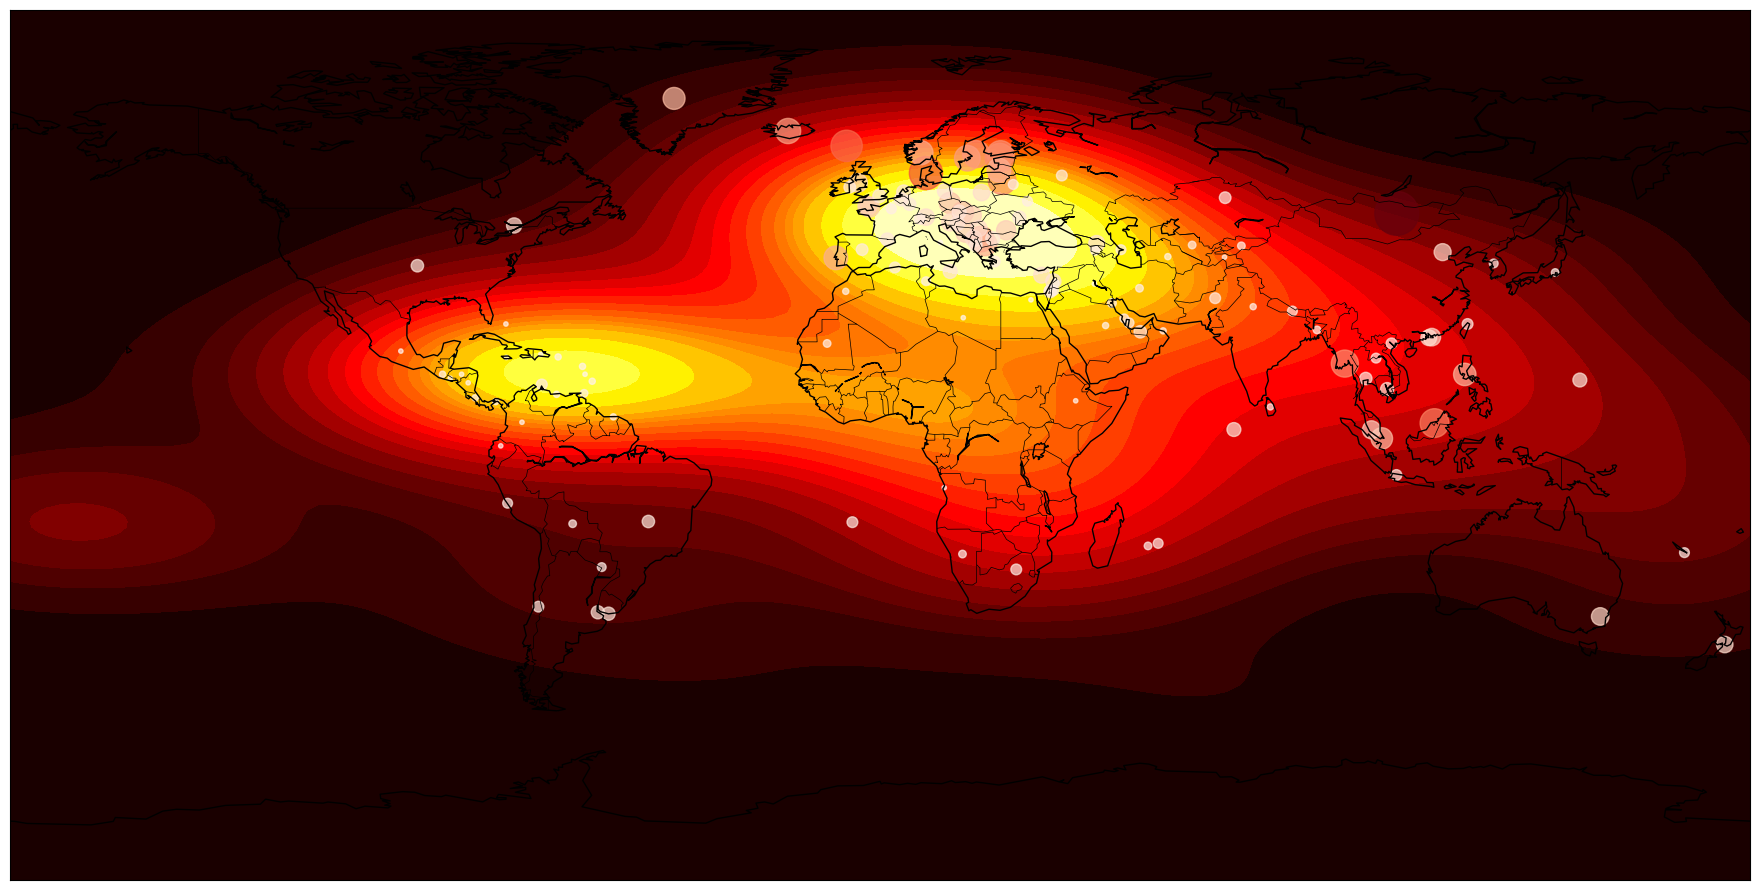

In [127]:
# 创建底图和热力图
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111)

# 创建Basemap实例，并设置经纬度范围
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90, resolution='c', ax=ax)
m.drawcoastlines()
m.drawcountries()

# 绘制核密度估计图
kde = sns.kdeplot(x=coordinates[:, 0], y=coordinates[:, 1], cmap="hot", fill=True, thresh=0, levels=20, ax=ax,alpha=1)

# 绘制散点图
x, y = m(coordinates[:, 0], coordinates[:, 1])  # 将经纬度转换为地图投影坐标
scatter = ax.scatter(x, y, s=weights*10, c=weights, cmap='Reds', alpha=0.7)

# 显示图例
#plt.colorbar(scatter, ax=ax, label='Weight')

# 隐藏标题和轴标签
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

# 显示图形
plt.tight_layout()
plt.show()



In [182]:
weights = min_max_scaling(weights, 0, 10)
weights = weights*force

In [183]:
weights

array([16.61899898, 13.12900919,  5.81664964,  5.65045965,  5.48426966,
        4.98569969,  4.65331971,  4.15474974,  3.65617978,  3.48998979,
        3.3237998 ,  3.15760981,  2.99141982,  2.99141982,  2.82522983,
        2.65903984,  2.49284985,  2.49284985,  2.49284985,  2.49284985,
        2.32665986,  2.16046987,  1.99427988,  1.99427988,  1.99427988,
        1.82808989,  1.82808989,  1.82808989,  1.6618999 ,  1.6618999 ,
        1.49570991,  1.49570991,  1.49570991,  1.49570991,  1.32951992,
        1.32951992,  1.16332993,  1.16332993,  1.16332993,  1.16332993,
        1.16332993,  1.16332993,  1.16332993,  1.16332993,  1.16332993,
        1.16332993,  0.99713994,  0.99713994,  0.99713994,  0.99713994,
        0.99713994,  0.99713994,  0.99713994,  0.99713994,  0.83094995,
        0.83094995,  0.83094995,  0.83094995,  0.83094995,  0.83094995,
        0.83094995,  0.83094995,  0.83094995,  0.83094995,  0.83094995,
        0.83094995,  0.66475996,  0.66475996,  0.66475996,  0.66

In [184]:
import math
# 计算每个坐标点的重复次数
repeat_counts = np.round((weights)).astype(int)

# 初始化空列表存储重复后的经度和纬度
lon_repeated = []
lat_repeated = []

# 重复每个坐标点
for lon, lat, repeat in zip(coordinates[:, 0], coordinates[:, 1], repeat_counts):
    lon_repeated.extend(np.repeat(lon, repeat))
    lat_repeated.extend(np.repeat(lat, repeat))

# 转换为NumPy数组
lon_repeated = np.array(lon_repeated)
lat_repeated = np.array(lat_repeated)



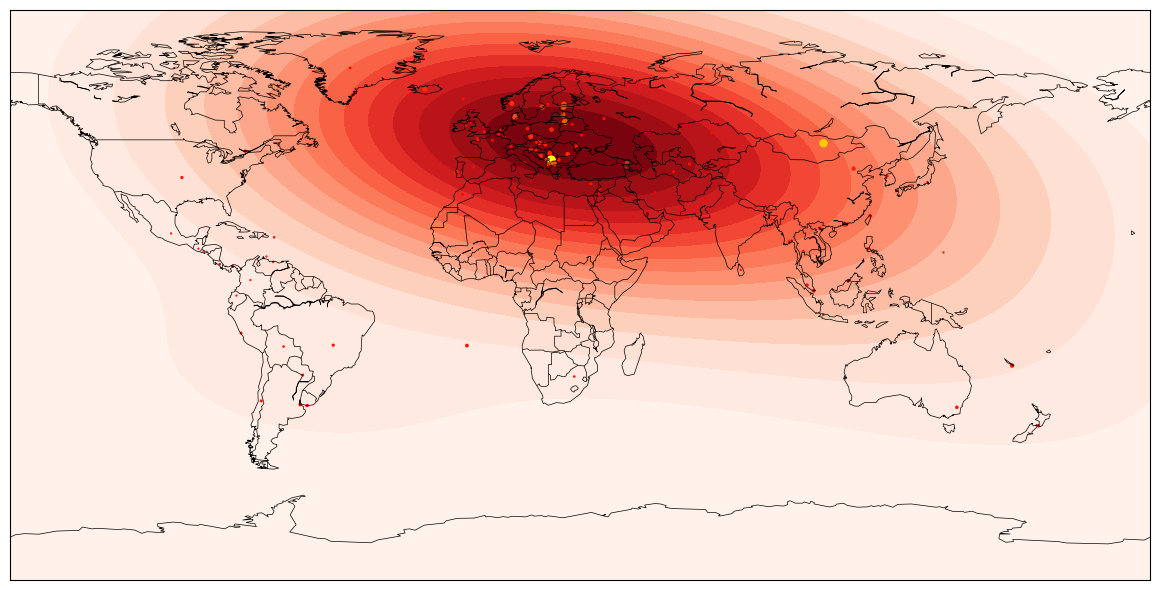

In [185]:
# 创建底图和热力图
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

m = Basemap(projection='cyl', llcrnrlon=-160, llcrnrlat=-80, urcrnrlon=210, urcrnrlat=90, resolution='c', ax=ax)

# 绘制地图
m.drawcoastlines(linewidth=0.5)  
m.drawcountries(linewidth=0.5)  

# 绘制核密度估计图（考虑权重）
kde = sns.kdeplot(x=lon_repeated, y=lat_repeated, cmap="Reds", fill=True, thresh=0, levels=16, bw_method=1.2, ax=ax, alpha=1)

# 绘制散点图
x, y = m(coordinates[:, 0], coordinates[:, 1])  # 将经纬度转换为地图投影坐标
scatter = ax.scatter(x, y, s=weights*2, c=min_max_scaling(weights, 0, 10), cmap='autumn', alpha=1)
ax.set_xlim(-150, 210)
ax.set_ylim(-90, 90)

# 隐藏标题和轴标签
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

# 显示图形
plt.tight_layout()
plt.show()


### 实验demo


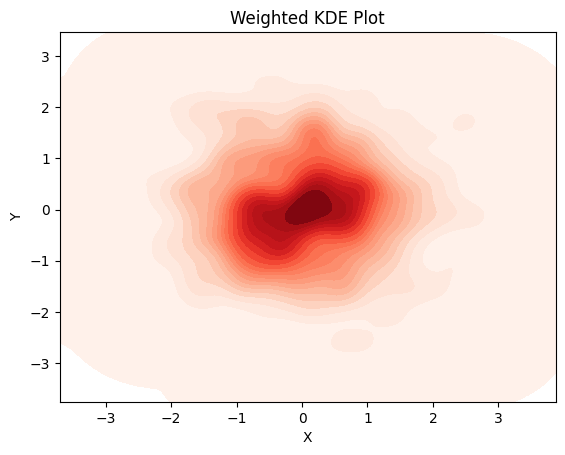

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 创建模拟数据
np.random.seed(0)
n_samples = 1000
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, cov, n_samples).T
weights = np.random.rand(n_samples) * 10  # 随机生成权重

# 计算点的数量
n_repeats = np.round(weights).astype(int)  # 根据权重计算重复次数

# 重复坐标点
x_repeated = np.repeat(x, n_repeats)
y_repeated = np.repeat(y, n_repeats)

# 绘制核密度估计图
sns.kdeplot(x=x_repeated, y=y_repeated, cmap='Reds', fill=True, thresh=0, levels=20)
plt.title('Weighted KDE Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 战队之最

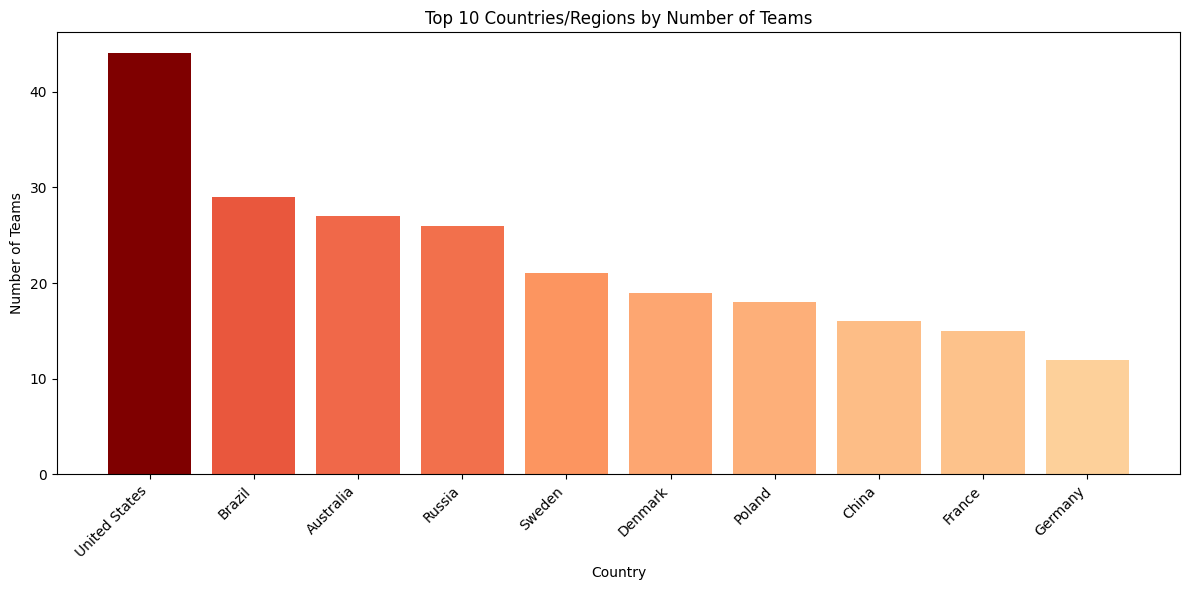

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 数据
data = {
    "Albania": 1, "Argentina": 4, "Asia": 1, "Australia": 27, "Belarus": 2,
    "Belgium": 2, "Brazil": 29, "Bulgaria": 10, "CIS": 3, "Canada": 6,
    "China": 16, "Colombia": 2, "Czech Republic": 2, "Denmark": 19, "Estonia": 1,
    "Europe": 13, "Finland": 8, "France": 15, "Germany": 12, "Hungary": 2,
    "India": 1, "Indonesia": 3, "Japan": 1, "Kazakhstan": 5, "Korea": 3,
    "Lithuania": 1, "Malaysia": 2, "Mongolia": 4, "Netherlands": 1, "New Zealand": 1,
    "North America": 3, "Norway": 5, "Oceania": 1, "Philippines": 3, "Poland": 18,
    "Portugal": 5, "Romania": 2, "Russia": 26, "Serbia": 5, "Singapore": 3,
    "Slovakia": 2, "South Africa": 2, "South America": 1, "Spain": 2, "Sweden": 21,
    "Thailand": 6, "Turkey": 4, "Ukraine": 7, "United Arab Emirates": 1,
    "United Kingdom": 3, "United States": 44,
}

# 过滤掉“Europe”数据
data_filtered = {country: teams for country, teams in data.items() if country != 'Europe'}

# 转换数据为DataFrame格式
df = pd.DataFrame(list(data_filtered.items()), columns=['Country', 'Teams'])

# 排序数据
df_sorted = df.sort_values(by='Teams', ascending=False).head(10)  # 取前十个国家或地区

# 创建颜色映射
colors = plt.cm.OrRd(df_sorted['Teams'] / float(max(df_sorted['Teams'])))

# 创建柱状图
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted['Country'], df_sorted['Teams'], color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Teams')
plt.title('Top 10 Countries/Regions by Number of Teams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.OrRd, norm=plt.Normalize(vmin=0, vmax=max(df_sorted['Teams'])))
plt.show()


In [40]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('./CsgoStat/team_stats.csv')

# 计算kill和death，并四舍五入为整数
kill_values = []
death_values = []

# 计算kill和death的平均值
mean_kill = df['kill'].mean()
mean_death = df['death'].mean()

for index, row in df.iterrows():
    kd = row['kd']
    kd_diff = row['kd_diff']
    if kd != 1:  # 检查除数是否为零
        kill = int(round(kd_diff / (kd - 1) * kd))
        death = int(round(kd_diff / (kd - 1)))
    else:
        kill = int(mean_kill)  # 除数为零，使用平均值
        death = int(mean_death)
    kill_values.append(kill)
    death_values.append(death)

# 将计算结果添加到DataFrame中
df['kill'] = kill_values
df['death'] = death_values

# 更新CSV文件
df.to_csv('./CsgoStat/team_stats.csv', index=False)


In [41]:
df

,Unnamed: 0,name,country,total_maps,kd_diff,kd,rating,kill,death,force
0,0,Grayhound,Australia,553,7229,1.16,1.07,52410,45181,16647
1,1,Recca,Indonesia,280,1816,1.08,1.07,24516,22700,6230
2,2,Kings,Australia,122,1922,1.20,1.07,11532,9610,4000
3,3,Flash,China,316,1559,1.06,1.07,27542,25983,6512
4,4,DarkPassage,Turkey,122,1177,1.11,1.06,11877,10700,3267
...,...,...,...,...,...,...,...,...,...,...
356,356,Unicorns of Love,Germany,178,-1536,0.90,0.95,13824,15360,837
357,357,EMP,China,125,-556,0.95,0.94,10564,11120,1169
358,358,Bulldozer,Brazil,106,-814,0.92,0.94,9361,10175,742
359,359,Dynasty,Australia,101,-473,0.95,0.93,8987,9460,976


In [42]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('./CsgoStat/team_stats.csv')

# 按击杀数降序排序并取前10行
top_kill_teams = df.sort_values(by='kill', ascending=False).head(10)

# 显示前10个战队的名称和国家
for idx, row in top_kill_teams.iterrows():
    print(f"战队名称：{row['name']}")
    print(f"所属国家：{row['country']}")
    print(f"击杀数：{row['kill']}")
    print("---------")



战队名称：NIP
所属国家：Sweden
击杀数：179531
---------
战队名称：mousesports
所属国家：Europe
击杀数：175708
---------
战队名称：HellRaisers
所属国家：CIS
击杀数：173043
---------
战队名称：Virtus.pro
所属国家：Poland
击杀数：164628
---------
战队名称：Natus Vincere
所属国家：CIS
击杀数：159445
---------
战队名称：Complexity
所属国家：Europe
击杀数：158772
---------
战队名称：fnatic
所属国家：Sweden
击杀数：157605
---------
战队名称：G2
所属国家：France
击杀数：153612
---------
战队名称：Dignitas
所属国家：Denmark
击杀数：137394
---------
战队名称：LDLC
所属国家：France
击杀数：131631
---------


In [43]:
# 按死亡数降序排序并取前10行
top_death_teams = df.sort_values(by='death', ascending=False).head(10)

# 显示前10个战队的名称和国家
for idx, row in top_death_teams.iterrows():
    print(f"战队名称：{row['name']}")
    print(f"所属国家：{row['country']}")
    print(f"死亡数：{row['death']}")
    print("---------")


战队名称：HellRaisers
所属国家：CIS
死亡数：169650
---------
战队名称：mousesports
所属国家：Europe
死亡数：168950
---------
战队名称：NIP
所属国家：Sweden
死亡数：167786
---------
战队名称：Virtus.pro
所属国家：Poland
死亡数：161400
---------
战队名称：Complexity
所属国家：Europe
死亡数：157200
---------
战队名称：G2
所属国家：France
死亡数：150600
---------
战队名称：fnatic
所属国家：Sweden
死亡数：150100
---------
战队名称：Natus Vincere
所属国家：CIS
死亡数：149014
---------
战队名称：Dignitas
所属国家：Denmark
死亡数：134700
---------
战队名称：LDLC
所属国家：France
死亡数：129050
---------


In [44]:
# 按评级降序排序并取前10行
top_rating_teams = df.sort_values(by='rating', ascending=False).head(10)

# 显示前10个战队的名称和国家
for idx, row in top_rating_teams.iterrows():
    print(f"战队名称：{row['name']}")
    print(f"所属国家：{row['country']}")
    print(f"评级：{row['rating']}")
    print("---------")
    


战队名称：Grayhound
所属国家：Australia
评级：1.07
---------
战队名称：Kings
所属国家：Australia
评级：1.07
---------
战队名称：Flash
所属国家：China
评级：1.07
---------
战队名称：Recca
所属国家：Indonesia
评级：1.07
---------
战队名称：DarkPassage
所属国家：Turkey
评级：1.06
---------
战队名称：TYLOO
所属国家：China
评级：1.06
---------
战队名称：Sinners
所属国家：Czech Republic
评级：1.06
---------
战队名称：ORDER
所属国家：Australia
评级：1.05
---------
战队名称：MVP Project
所属国家：Korea
评级：1.05
---------
战队名称：ATK
所属国家：United States
评级：1.05
---------


In [45]:
# 按总地图数量降序排序并取前10行
top_map_teams = df.sort_values(by='total_maps', ascending=False).head(10)

# 显示前10个战队的名称和国家
for idx, row in top_map_teams.iterrows():
    print(f"战队名称：{row['name']}")
    print(f"所属国家：{row['country']}")
    print(f"总地图数量：{row['total_maps']}")
    print("---------")
    

战队名称：Virtus.pro
所属国家：Poland
总地图数量：1967
---------
战队名称：NIP
所属国家：Sweden
总地图数量：1915
---------
战队名称：mousesports
所属国家：Europe
总地图数量：1809
---------
战队名称：HellRaisers
所属国家：CIS
总地图数量：1785
---------
战队名称：Natus Vincere
所属国家：CIS
总地图数量：1760
---------
战队名称：fnatic
所属国家：Sweden
总地图数量：1748
---------
战队名称：ALTERNATE aTTaX
所属国家：Germany
总地图数量：1600
---------
战队名称：Liquid
所属国家：United States
总地图数量：1477
---------
战队名称：G2
所属国家：France
总地图数量：1435
---------
战队名称：LDLC
所属国家：France
总地图数量：1398
---------


In [46]:

# 计算衡量指标并加入DataFrame
df['metric'] = (df['rating'] * 100 / df['total_maps']) ** 2

# 按衡量指标降序排序并取前10行
top_teams_metric = df.sort_values(by='metric', ascending=False).head(10)

# 显示前10个战队的名称和国家
for idx, row in top_teams_metric.iterrows():
    print(f"战队名称：{row['name']}")
    print(f"所属国家：{row['country']}")
    print(f"总地图数量：{row['total_maps']}")
    print(f"评级：{row['rating']}")
    print("---------")

战队名称：HZ
所属国家：Singapore
总地图数量：103
评级：1.05
---------
战队名称：BlackOut
所属国家：United States
总地图数量：101
评级：1.01
---------
战队名称：Brute
所属国家：Czech Republic
总地图数量：101
评级：1.01
---------
战队名称：9INE
所属国家：Turkey
总地图数量：102
评级：1.02
---------
战队名称：GOSU
所属国家：Korea
总地图数量：104
评级：1.04
---------
战队名称：OneThree
所属国家：China
总地图数量：105
评级：1.04
---------
战队名称：g3x
所属国家：Brazil
总地图数量：101
评级：1.0
---------
战队名称：Clan-Mystik
所属国家：France
总地图数量：106
评级：1.04
---------
战队名称：High Coast
所属国家：United States
总地图数量：102
评级：1.0
---------
战队名称：5balls
所属国家：Russia
总地图数量：101
评级：0.99
---------


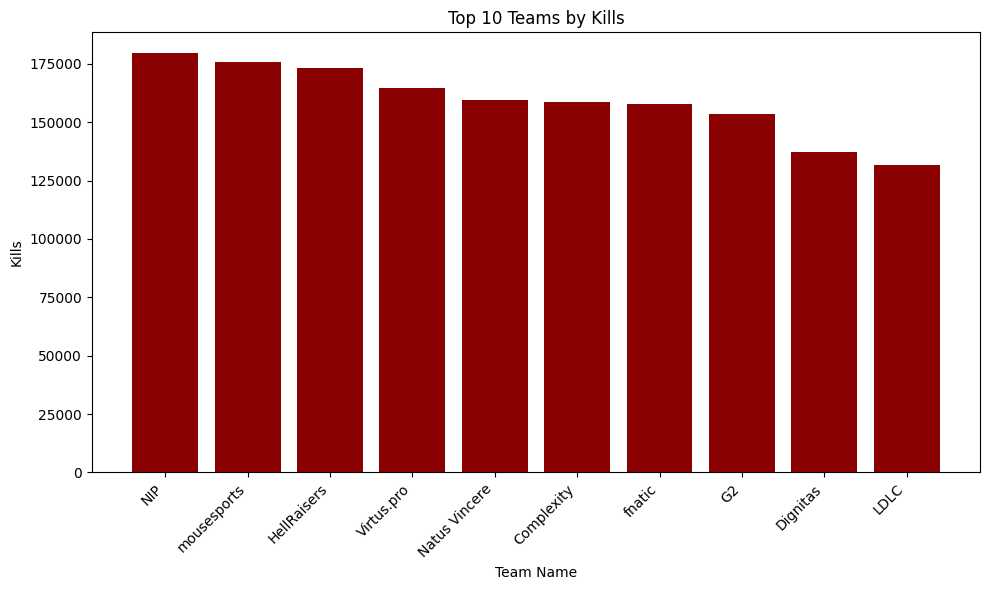

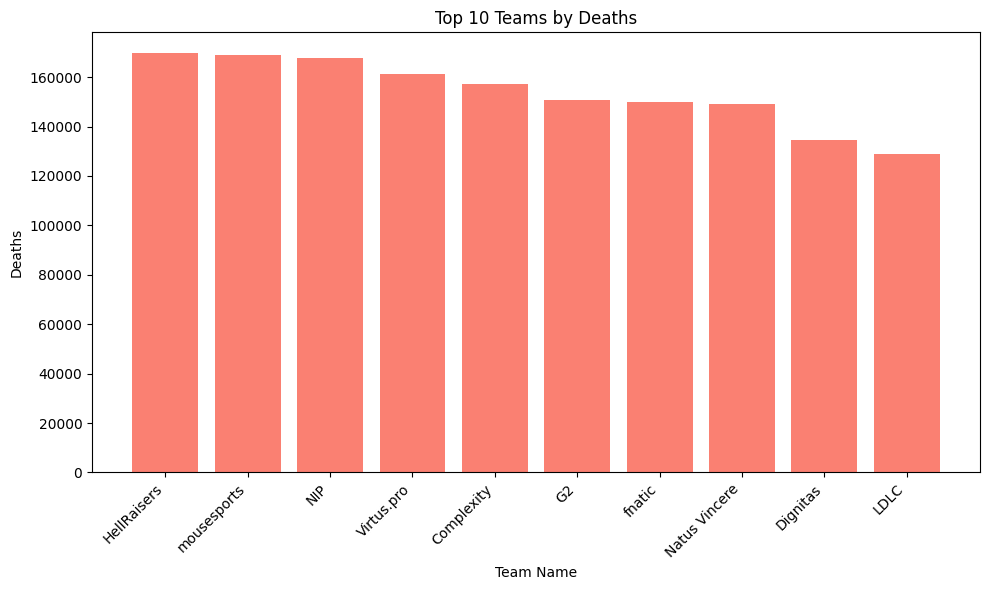

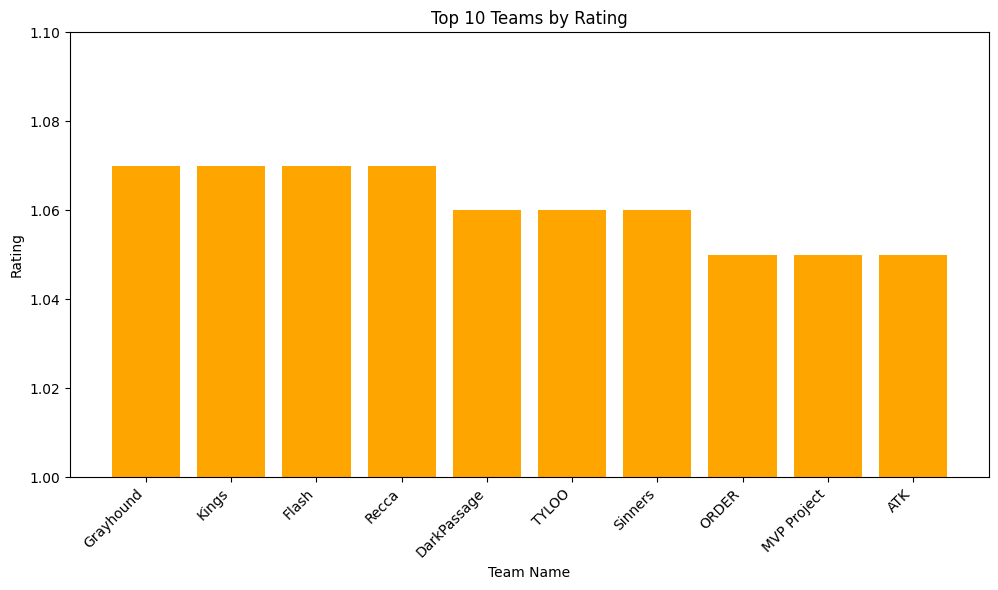

In [47]:
# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_kill_teams['name'], top_kill_teams['kill'], color='DarkRed')
plt.xlabel('Team Name')
plt.ylabel('Kills')
plt.title('Top 10 Teams by Kills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_death_teams['name'], top_death_teams['death'], color='salmon')
plt.xlabel('Team Name')
plt.ylabel('Deaths')
plt.title('Top 10 Teams by Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_rating_teams['name'], top_rating_teams['rating'], color='orange')
plt.xlabel('Team Name')
plt.ylabel('Rating')
plt.title('Top 10 Teams by Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(1.0,1.1)
plt.show()

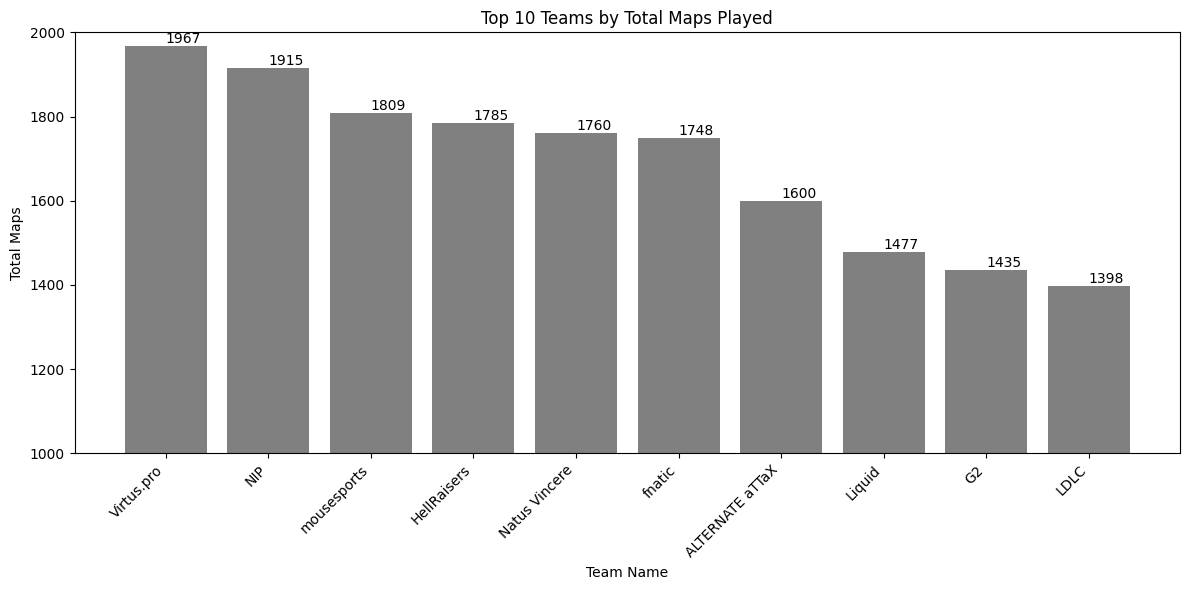

In [48]:
# 创建柱状图
plt.figure(figsize=(12, 6))
bars = plt.bar(top_map_teams['name'], top_map_teams['total_maps'], color='grey')
plt.xlabel('Team Name')
plt.ylabel('Total Maps')
plt.title('Top 10 Teams by Total Maps Played')
plt.xticks(rotation=45, ha='right')
plt.ylim(1000,2000)
plt.tight_layout()

# 添加数据标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # 显示数据标签

plt.show()

In [49]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('CsgoStat/team_stats.csv')

# 计算战力值
df['force'] = ((df['total_maps'] * 1.5 + df['kd_diff'] * 1 + df['kill'] * 0.1 + df['death'] * 0.05) * df['rating']).astype(int)
# 将结果更新到文件中
df.to_csv('CsgoStat/team_stats.csv', index=False)

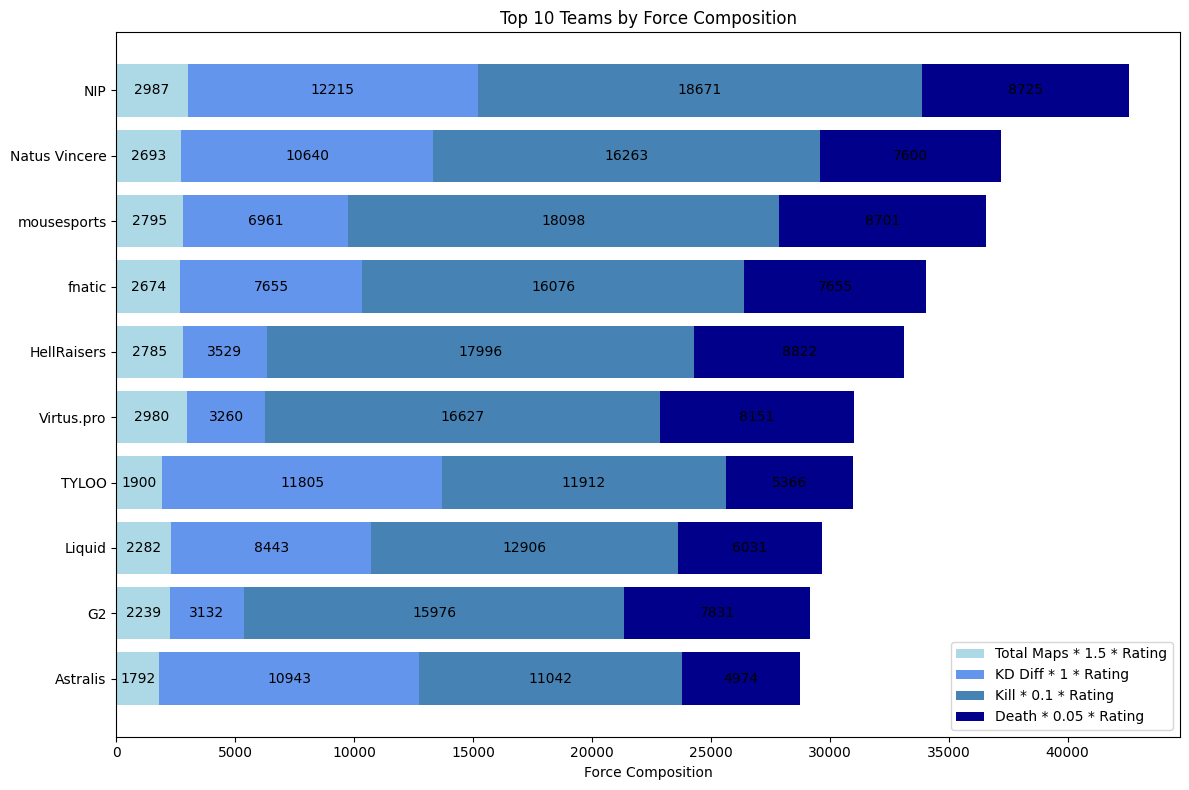

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('CsgoStat/team_stats.csv')

# 计算战力值
df['force'] = ((df['total_maps'] * 1.5 + df['kd_diff'] * 1 + df['kill'] * 0.1 + df['death'] * 0.05) * df['rating']).astype(int)

# 根据战力值排序并选择前十名
top_10_teams = df.sort_values(by='force', ascending=False).head(10)

# 计算各因素的系数构成（系数乘以rating）
coef_total_maps = top_10_teams['total_maps'] * 1.5 * top_10_teams['rating']
coef_kd_diff = top_10_teams['kd_diff'] * 1 * top_10_teams['rating']
coef_kill = top_10_teams['kill'] * 0.1 * top_10_teams['rating']
coef_death = top_10_teams['death'] * 0.05 * top_10_teams['rating']

# 创建条形图
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制条形图
bars1 = ax.barh(top_10_teams['name'], coef_total_maps, color='lightblue', label='Total Maps * 1.5 * Rating')
bars2 = ax.barh(top_10_teams['name'], coef_kd_diff, color='cornflowerblue', left=coef_total_maps, label='KD Diff * 1 * Rating')
bars3 = ax.barh(top_10_teams['name'], coef_kill, color='steelblue', left=coef_total_maps + coef_kd_diff, label='Kill * 0.1 * Rating')
bars4 = ax.barh(top_10_teams['name'], coef_death, color='darkblue', left=coef_total_maps + coef_kd_diff + coef_kill, label='Death * 0.05 * Rating')

# 添加数值标签（四舍五入到整数显示）
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{round(width)}',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    va='center', ha='center')

# 设置图表标题和轴标签
ax.set_xlabel('Force Composition')
ax.set_title('Top 10 Teams by Force Composition')

# 添加图例
ax.legend()

# 降序排列
ax.invert_yaxis()

# 显示图表
plt.tight_layout()
plt.show()


## 战队对地图熟练度对rating的影响

In [51]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
import random

# 定义数据
data = [
    ["Albania", 41.1533, 20.1683, 1], ["Argentina", -38.4161, -63.6167, 4],
    ["Asia", 34.0479, 100.6197, 1], ["Australia", -25.2744, 133.7751, 27],
    ["Belarus", 53.7098, 27.9534, 2], ["Belgium", 50.5039, 4.4699, 2],
    ["Brazil", -14.2350, -51.9253, 29], ["Bulgaria", 42.7339, 25.4858, 10],
    ["CIS", 55.7558, 37.6176, 3], ["Canada", 56.1304, -106.3468, 6],
    ["China", 35.8617, 104.1954, 16], ["Colombia", 4.5709, -74.2973, 2],
    ["Czech Republic", 49.8175, 15.4730, 2], ["Denmark", 56.2639, 9.5018, 19],
    ["Estonia", 58.5953, 25.0136, 1], ["Europe", 48.8566, 2.3522, 13],
    ["Finland", 61.9241, 25.7482, 8], ["France", 46.6034, 1.8883, 15],
    ["Germany", 51.1657, 10.4515, 12], ["Hungary", 47.1625, 19.5033, 2],
    ["India", 20.5937, 78.9629, 1], ["Indonesia", -0.7893, 113.9213, 3],
    ["Japan", 36.2048, 138.2529, 1], ["Kazakhstan", 48.0196, 66.9237, 5],
    ["Korea", 35.9078, 127.7669, 3], ["Lithuania", 55.1694, 23.8813, 1],
    ["Malaysia", 4.2105, 101.9758, 2], ["Mongolia", 46.8625, 103.8467, 4],
    ["Netherlands", 52.1326, 5.2913, 1], ["New Zealand", -40.9006, 174.8860, 1],
    ["North America", 54.525961, -105.255119, 3], ["Norway", 60.4720, 8.4689, 5],
    ["Oceania", -25.2744, 133.7751, 1], ["Philippines", 12.8797, 121.7740, 3],
    ["Poland", 51.9194, 19.1451, 18], ["Portugal", 39.3999, -8.2245, 5],
    ["Romania", 45.9432, 24.9668, 2], ["Russia", 61.5240, 105.3188, 26],
    ["Serbia", 44.0165, 21.0059, 5], ["Singapore", 1.3521, 103.8198, 3],
    ["Slovakia", 48.6690, 19.6990, 2], ["South Africa", -30.5595, 22.9375, 2],
    ["South America", -14.2350, -51.9253, 1], ["Spain", 40.4637, -3.7492, 2],
    ["Sweden", 60.1282, 18.6435, 21], ["Thailand", 15.8700, 100.9925, 6],
    ["Turkey", 38.9637, 35.2433, 4], ["Ukraine", 48.3794, 31.1656, 7],
    ["United Arab Emirates", 23.4241, 53.8478, 1], ["United Kingdom", 55.3781, -3.4360, 3],
    ["United States", 37.0902, -95.7129, 44],
]

# 创建 Scatter 实例
scatter = (
    Scatter()
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))  # 不显示标签
    .set_global_opts(
        title_opts=opts.TitleOpts(title="World Team Density Map - Scatter"),
        visualmap_opts=opts.VisualMapOpts(max_=50),  # 根据实际数据调整最大值
        xaxis_opts=opts.AxisOpts(name="Longitude"),  # 设置 X 轴名称
        yaxis_opts=opts.AxisOpts(name="Latitude"),  # 设置 Y 轴名称
    )
)

# 遍历数据，根据权重放置点
for item in data:
    x, y, weight = item[1], item[2], item[3]  # 获取经度、纬度、权重信息
    for _ in range(weight):  # 根据权重决定放置点的数量
        scatter.add_xaxis([random.uniform(x - 1, x + 1)]).add_yaxis("", [y], symbol_size=8)  # 添加点

# 生成 HTML 文件
scatter.render("world_team_density_weighted_2d.html")


'd:\\VsCode Files\\Visualization\\vis\\Myproject\\world_team_density_weighted_2d.html'

# 对职业选手的解析

In [52]:
df2 = pd.read_csv('./CsgoStat/player_stats.csv')
df2

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...,...
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


# 对武器的数据可视化